## Support vector mechanism have two approaches
### one vs one approach
### one vs all approach

# one versus all

### example:
#### classes:(+,*,^)
#### model1=((+),(*,^))
#### model1=((*),(^,+))
#### model1=((^),(+,*))

# one versus one
## Example:
## with three data points,it will create 3 different pairs
#### pair1=(+,*)
#### pair2=(^,*)
#### pair3=(+,^)


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df=sns.load_dataset("iris")

In [43]:
df=df.replace({"species":{"setosa":1,"versicolor":2,"virginica":3}})

In [44]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


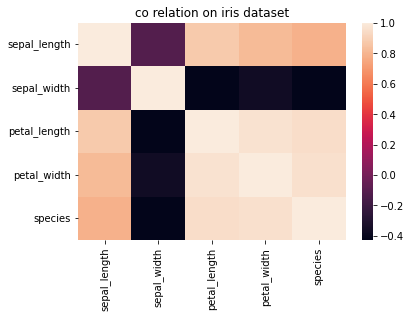

In [45]:
sns.heatmap(df.corr())
plt.title("co relation on iris dataset")
plt.show()

In [46]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [47]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [62]:
import sklearn.svm as svm
clf=svm.SVC(random_state=0)

In [63]:
clf.fit(xtrain,ytrain)

SVC(random_state=0)

In [64]:
ypred=clf.predict(xtest)

In [65]:
ypred

array([2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 2, 1, 3, 1,
       3, 3, 1, 3, 2, 2, 1, 2], dtype=int64)

In [66]:
ytest

array([2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 2, 1, 3, 1,
       2, 3, 1, 3, 2, 2, 1, 2], dtype=int64)

In [67]:
from sklearn import metrics

In [68]:
# Confusion Matrix
import matplotlib.pyplot as plt

In [85]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[ 5  0  0]
 [ 0 13  1]
 [ 0  0 11]]


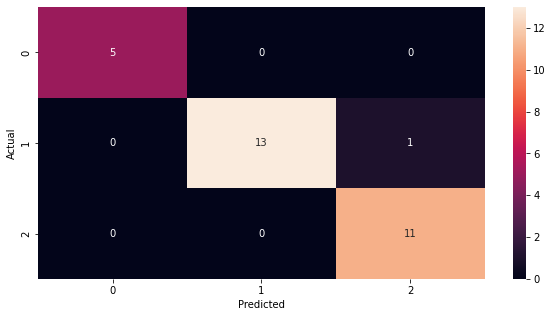

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [88]:
n_class=3
for k in range(0,1):
    lst_m=[]
    for i in range(n_class):
        lst=[]
        for j in range(n_class):
            item=cm[i,j]
            lst.append(item)
        lst_m.append(lst)
print(lst_m)






[[5, 0, 0], [0, 13, 1], [0, 0, 11]]


In [96]:
s=0
for i in lst_m:
    for j in i:
        s+=j
print(s)

30


In [110]:
accuracy=(lst_m[0][0]*lst_m[1][1]*lst_m[2][2])/s
# # accuracy=(5*13*11)/(5+13+11+1)
print(f"accuracy is :{accuracy}")
# # precision for class 1=total number of correctly predicted class 1 out of all predicted class 1
for i in range(3):
    deno=0
    nume=0
    for j in range(3):
        deno+=lst_m[j][i]
        if(i==j):
            nume=lst_m[j][i]
    precision=nume/deno
    print(f"precision is {precision}")



accuracy is :23.833333333333332
precision is 1.0
precision is 1.0
precision is 0.9166666666666666


In [109]:
for i in range(3):
    deno=0
    nume=0
    for j in range(3):
        deno+=lst_m[i][j]
        if(i==j):
            nume=lst_m[i][j]
    recall=nume/deno 
    print(f"recall is {recall}")

recall is 1.0
recall is 0.9285714285714286
recall is 1.0
